<a href="https://colab.research.google.com/github/lalitdadhich/-TASK-2-IOT-THE-SPARKS-FOUNDATION/blob/main/Task2__Computer_Vision_IOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**GRIP : The Sparks Foundations**
#**Author : Lalit Dadhich**

##**Task-2: Color Identification in Images**
## Implement an image color detector which identifies all the colors in an image or video

##**Import required Libraries**

In [44]:
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.cluster import KMeans
from collections import Counter
import cv2

%matplotlib inline

##**Reading an Image**

In [45]:
def get_img(file_path):
    image = cv2.imread(file_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

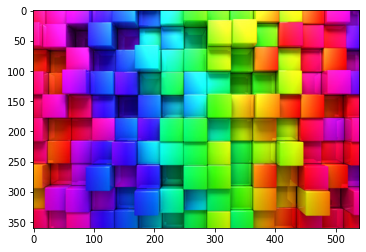

In [46]:
image = get_img("imgg.jpg")
plt.imshow(image)

##**Resize the image**

In [47]:
image = cv2.resize(image, (700, 500))

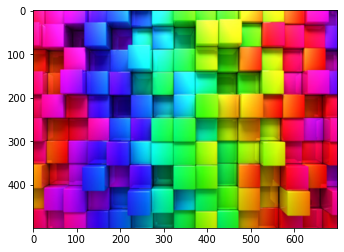

In [48]:
plt.imshow(image)

In [49]:
print(image)

[[[255  25 111]
  [254  26 112]
  [254  26 115]
  ...
  [ 73   1 126]
  [ 73   1 128]
  [ 73   1 129]]

 [[255  25 111]
  [254  26 112]
  [254  26 115]
  ...
  [ 75   1 130]
  [ 75   1 132]
  [ 74   1 133]]

 [[255  25 110]
  [254  25 111]
  [254  26 114]
  ...
  [ 78   1 135]
  [ 77   1 137]
  [ 76   2 137]]

 ...

 [[216   1  54]
  [216   1  55]
  [216   0  56]
  ...
  [204   1  50]
  [204   1  52]
  [204   1  53]]

 [[214   1  52]
  [215   1  54]
  [215   0  56]
  ...
  [205   1  51]
  [205   1  53]
  [205   1  54]]

 [[214   0  52]
  [215   1  54]
  [215   0  56]
  ...
  [206   2  52]
  [206   2  54]
  [206   2  55]]]


In [50]:
image.shape

(500, 700, 3)

In [51]:
type(image)

numpy.ndarray

In [52]:
x = image.reshape(image.shape[0]*image.shape[1],3)

In [53]:
x

array([[255,  25, 111],
       [254,  26, 112],
       [254,  26, 115],
       ...,
       [206,   2,  52],
       [206,   2,  54],
       [206,   2,  55]], dtype=uint8)

##**K -Means Model**

##**Finding the top 5 color in the model**

In [54]:
km = KMeans(n_clusters=8)

In [55]:
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [56]:
prominent_colors = km.cluster_centers_
prominent_colors = prominent_colors.astype(int)
print(prominent_colors)

[[ 54  48 235]
 [200 211  20]
 [228  30  47]
 [ 25 218 203]
 [216  13 194]
 [139  37  18]
 [ 28  42 113]
 [ 41 205  49]]


Text(0.5, 1.0, 'Prominent Colors')

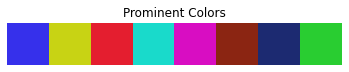

In [57]:
plt.imshow([prominent_colors])
plt.axis('off')
plt.title("Prominent Colors")

In [58]:
intensity_list = Counter(km.labels_)
print(intensity_list)

Counter({2: 55334, 7: 53513, 0: 49065, 1: 47062, 4: 42787, 5: 37311, 3: 32530, 6: 32398})


In [59]:
keys = list(intensity_list.keys())
values = list(intensity_list.values())
print(keys)
print(values)

[2, 4, 0, 6, 3, 7, 1, 5]
[55334, 42787, 49065, 32398, 32530, 53513, 47062, 37311]


##**Visualization Of Prominency level**

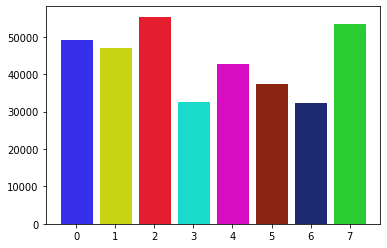

In [60]:
bar_graph = plt.bar(keys,values)
for x in range(0, len(prominent_colors)):
  s=bar_graph[x].set_color(prominent_colors[keys[x]].astype(float)/255.0)
plt.show(bar_graph)

##**Finding images using Colors**

In [61]:
Dir_name = 'colors'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0],
    'RED':[128,0,0],
    'BLACK': [0,0,0],
    'WHITE': [255,255,255]
}

images = []

for file in os.listdir(Dir_name):
    if file.startswith('i'):
        images.append(get_img(os.path.join(Dir_name, file)))

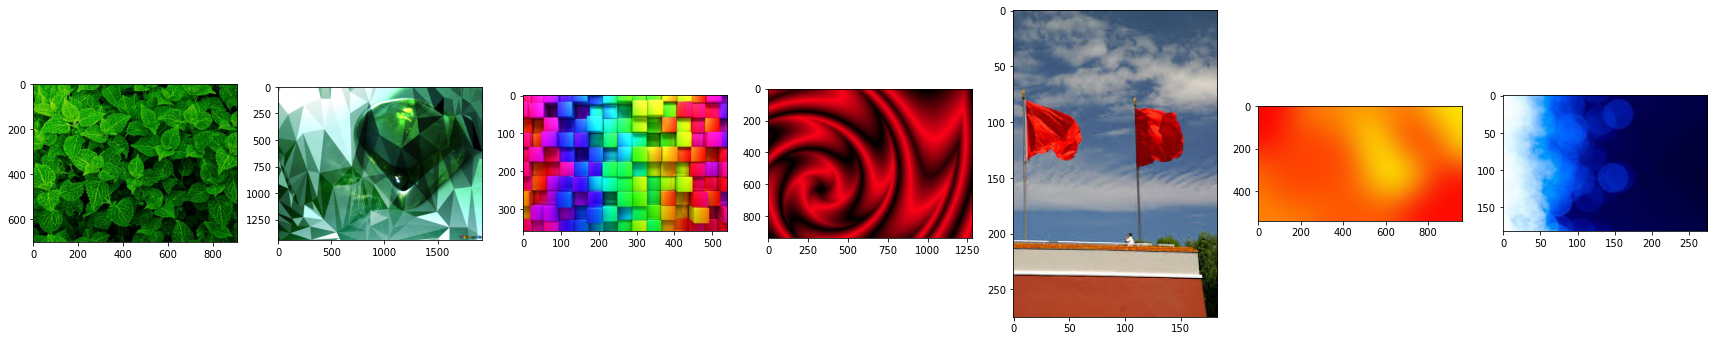

In [62]:
plt.figure(figsize=(30, 25))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [63]:
def get_colors(image,number_of_colors,show_chart):
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    counts = Counter(labels)
    center_colors = clf.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    return rgb_colors

In [64]:
from skimage.color import rgb2lab, deltaE_cie76
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color,curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [65]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

##**Color Detections**

##**Search RED**

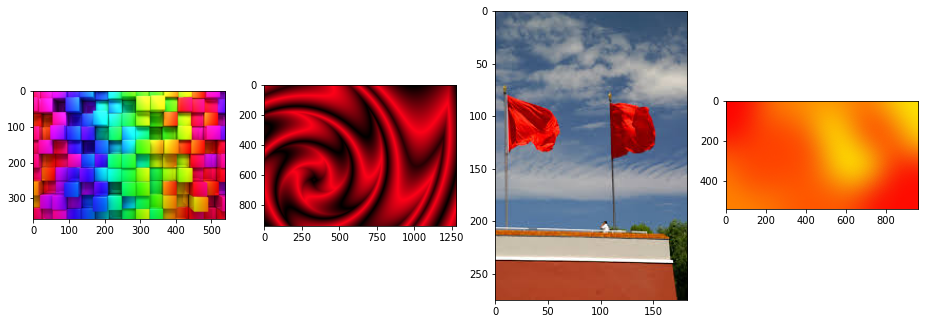

In [66]:
selected_color=COLORS['RED']
threshold=60
plt.figure(figsize = (20, 10))
show_selected_images(images,selected_color, threshold, 5)

##**Search Green**

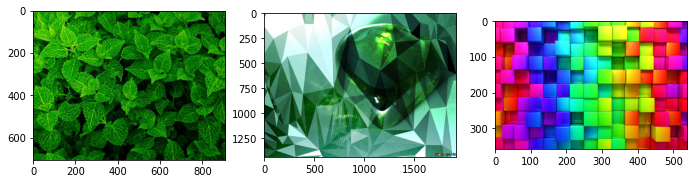

In [67]:
selected_color=COLORS['GREEN']
threshold=60
plt.figure(figsize = (20, 10))
show_selected_images(images,selected_color, threshold, 5)

##**Search Blue**

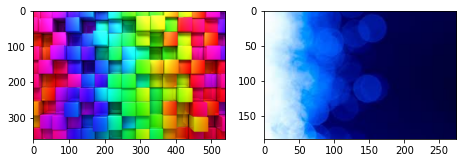

In [68]:
selected_color=COLORS['BLUE']
threshold=60
plt.figure(figsize = (20, 10))
show_selected_images(images,selected_color, threshold, 5)

##**Thank You , The Sparks Foundations**